# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# Load the train_dataset, train_salaries, test_dataset(pass your file path from drive)

data = pd.read_csv("./dataset/train_dataset.csv")

data_salaries = pd.read_csv("./dataset/train_salaries.csv")

test_df = pd.read_csv("./dataset/test_dataset.csv")


In [3]:
# check the train data

data.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
data.info()

In [ ]:
# check the train data salarie
data_salaries.head()

In [ ]:
# check the test data

test_df.head()


In [4]:
# Adding salary data to train_dataset using merge on jobId
train_data = data.merge(data_salaries,how='left', on='jobId')
# train_data.head()
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [5]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary'] > 30]
train_data = train_data.sample(frac=0.035)
train_data 

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
818324,JOB1362685226011,COMP62,CTO,BACHELORS,CHEMISTRY,SERVICE,7,88,88
676357,JOB1362685084044,COMP28,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,15,56,62
268035,JOB1362684675722,COMP10,CEO,HIGH_SCHOOL,NONE,WEB,1,94,86
897005,JOB1362685304692,COMP22,JANITOR,HIGH_SCHOOL,NONE,FINANCE,2,1,90
885342,JOB1362685293029,COMP14,MANAGER,BACHELORS,COMPSCI,AUTO,5,27,132
...,...,...,...,...,...,...,...,...,...
880888,JOB1362685288575,COMP12,CEO,BACHELORS,PHYSICS,EDUCATION,18,4,170
462577,JOB1362684870264,COMP56,CEO,MASTERS,BUSINESS,EDUCATION,15,81,123
628289,JOB1362685035976,COMP0,SENIOR,BACHELORS,COMPSCI,OIL,11,41,95
200081,JOB1362684607768,COMP1,CTO,DOCTORAL,PHYSICS,FINANCE,15,94,177


# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [6]:
# get all column names
train_data.columns



Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [ ]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()


In [ ]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test_df.info()



1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [ ]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  

train_data.describe()


In [ ]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_df.info()



## Get the total number of samples in the dataset using the len() function

In [ ]:
# len of train and test dataset
print(f"""Total Length of the Train Data: {len(train_data)}\n  
Total Lenght of Test Data: {len(test_df)}""")



## Get unique values

In [ ]:
# get how many unique values are in train_dataset

train_data.nunique()



In [ ]:
# get how many unique values are in test_dataset

test_df.nunique()



## Counting the total number of missing values¶

In [ ]:
# Check for missing values in all the columnns of the train_dataset

train_data.isnull().sum()


In [ ]:
 # Check for missing values in all the columnns of the test_dataset
test_df.isnull().sum()



## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [7]:
# drop jobId and companyId from train_dataset
train_data = train_data.drop(['jobId','companyId'], axis=1, inplace=False)
train_data.head()




,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
818324,CTO,BACHELORS,CHEMISTRY,SERVICE,7,88,88
676357,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,15,56,62
268035,CEO,HIGH_SCHOOL,NONE,WEB,1,94,86
897005,JANITOR,HIGH_SCHOOL,NONE,FINANCE,2,1,90
885342,MANAGER,BACHELORS,COMPSCI,AUTO,5,27,132


In [8]:
# drop jobId and companyId from test_dataset
test_data = test_df.drop(['jobId','companyId'], axis=1, inplace=False)
test_data.head()



,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [9]:
category_columns = [column for column in train_data.columns if train_data[column].dtype == "O"]
numerical_columns = [column for column in train_data.columns if column not in category_columns]

## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [10]:
# Correlation metrix using pandas
corr = train_data.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.01,0.37
milesFromMetropolis,0.01,1.00,-0.30
salary,0.37,-0.30,1.00


## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

In [ ]:
# Correlation metrix using seaborn
ax = sns.heatmap(
    corr,
    center=0,
    cmap='coolwarm',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
)




## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [ ]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train_data[var_1], train_data[var_2])
    
    #Observed Values
    observed_values = contingency_table.values
    
    #Expected Values
    chi_square_statistic, p_value, degree_f, expected_values= chi2_contingency(contingency_table)

    print("Degree of Freedom: ",degree_f)
    #Significance Level 5%
    alpha = 0.05
    critical_value = chi2.ppf(q=1-alpha,df=degree_f)
    print('Significance level: ',alpha)
    print("chi-square statistic: ",chi_square_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [ ]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
chi_square_test_report = dict()
for x in category_columns:
    for i in category_columns:
        if i != x:
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')
            


            

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


In [ ]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
    plt.show()


    


# Loop through the different columns 
for i in numerical_columns:
    for j in numerical_columns:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


In [ ]:
# Histogram using pandas 
train_data.hist(figsize=(12,8))




From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


In [ ]:
# box plot using pandas 
# box plot for yearsExperience column
sns.boxplot(train_data['yearsExperience'])
print(train_data['yearsExperience'].describe())




from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

In [ ]:
# box plot using pandas 
# box plot for milesFromMetropolies column

sns.boxplot(train_data['milesFromMetropolis'])
print(train_data['milesFromMetropolis'].describe())





from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

In [ ]:
# box plot using pandas 
# box plot for salary column
sns.boxplot(train_data['salary'])
print(train_data['salary'].describe())




from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

In [ ]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x=train_data['yearsExperience'],y=train_data['salary'])







from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

In [ ]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x=train_data['milesFromMetropolis'],y=train_data['salary'])





from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


In [ ]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x=train_data['yearsExperience'],y=train_data['salary'])



## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


In [ ]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience',data=train_data,palette='viridis')




From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

In [ ]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(x='milesFromMetropolis',data=train_data,palette='viridis')




From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

In [ ]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x=train_data['yearsExperience'],y=train_data['salary'],data=train_data.iloc[:25000], palette='coolwarm')




from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

In [ ]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x=train_data['milesFromMetropolis'],y=train_data['salary'],data=train_data.iloc[:25000], palette='coolwarm')







from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

In [ ]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))




from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

In [ ]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))






from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

In [ ]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))





from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

In [ ]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))




from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [ ]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [ ]:
num_cols = [col for col in numerical_columns if col != 'salary']
train_data[num_cols]

In [ ]:
# creating a dataframe of just numerical values
train_for_vif = train_data[num_cols]


# target values
target = train_data['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

In [ ]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:, train_for_vif.columns == names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:, train_for_vif.columns != names[i]]
  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  results = model.fit()
 
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [ ]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train_data[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  # groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  unique_majors = train_anova[x].unique()
  for major in unique_majors:
      stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
      plt.title("Probability Plot - " +  str(major))
      plt.show()


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'])    #ss=sum of squares source, ms=mean sum of squares source
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

  # calculate MS
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.05
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = "two-tailed"
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("\n--------------------------------------------------------------------------------------")
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

In [ ]:
# perform anova test on major and salary
perform_anova_test('major', 'salary')



In [ ]:
# perform anova test on jobType and salary

perform_anova_test('jobType','salary')


In [ ]:
# perform anova test on degree and salary
perform_anova_test('degree','salary')



In [ ]:
# perform anova test on industry and salary
perform_anova_test('industry','salary')



In [ ]:
# perform anova test on jobType and yearsExperience
perform_anova_test('jobType','yearsExperience')



In [ ]:
# perform anova test on degree and yearsExperience
perform_anova_test('degree','yearsExperience')



In [ ]:
# perform anova test on major and yearsExperience
perform_anova_test('major','yearsExperience')



In [ ]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry','yearsExperience')

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

In [ ]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train_data



import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left',leaf_font_size=16)





observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [17]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  
  
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [18]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data, col_train)



# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [19]:
# Importing OneHotEncoder for encoding the categorical data
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):
    
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False
        
    # helper function to fit data  
    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out
    
    # helper function to transform data  
    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    
    # helper function to fit and transform data 
    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)
    
    # helper function to get new column names after fitting and tranforming data 
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [20]:
train_data.columns

Index(['jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis', 'salary'],
      dtype='object')

In [21]:
# Split the labels and the target
train_X = train_data.drop(['salary', 'yearsExperience','milesFromMetropolis'], axis=1)
train_Y = train_data['salary']

In [23]:
numerical_columns

['yearsExperience', 'milesFromMetropolis', 'salary']

In [24]:
category_columns

['jobType', 'degree', 'major', 'industry']

In [22]:
# Features

train_X.head()


,jobType,degree,major,industry
818324,CTO,BACHELORS,CHEMISTRY,SERVICE
676357,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION
268035,CEO,HIGH_SCHOOL,NONE,WEB
897005,JANITOR,HIGH_SCHOOL,NONE,FINANCE
885342,MANAGER,BACHELORS,COMPSCI,AUTO


In [26]:
# Target

train_Y.head()


818324     88
676357     62
268035     86
897005     90
885342    132
Name: salary, dtype: int64

In [27]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder() 
train_X = encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()



,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
818324,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.291667,0.888889
676357,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.625000,0.565657
268035,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.041667,0.949495
897005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.083333,0.010101
885342,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208333,0.272727


In [29]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X,train_Y, test_size=0.3)


In [30]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return np.sqrt(((x-y)**2).mean())
    


# Function for calculating all the relevant metrics 
def print_score(m):
    res = [
        rmse(m.predict(X_train),y_train),
        rmse(m.predict(X_test), y_test),
        m.score(X_train, y_train),
        m.score(X_test, y_test),
        median_absolute_error(m.predict(X_train),y_train),
        median_absolute_error(m.predict(X_test),y_test),
        metrics.median_absolute_error(m.predict(X_train),y_train),
        metrics.median_absolute_error(m.predict(X_test),y_test)
    ]
    

    
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedian_AE-Train: " + str(res[4]) + "\nMedian_AE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [34]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,
    _df], axis=0, ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]
    


    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(
        data=feature_importance_df,
        x='feature_importance',
        y='column',
        order= order,
        ax= ax,
        palette='viridis',
        orient='h'
    )
    ax.tick_params(axis='x', rotation=0)
    ax.set_title("Importance")
    ax.grid()
    fig.tight_layout()

    return fig, ax


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.700379646506292
RMSE-Test: 19.52923039453841
Score-Train: 0.737654850480834
Score-Test: 0.7440509398368451
MedAE-Train: 13.84375
MedAE-Test: 13.4921875
MeanAE-Train: 13.84375
MeanAE-Test: 13.4921875 

CPU times: total: 375 ms
Wall time: 235 ms


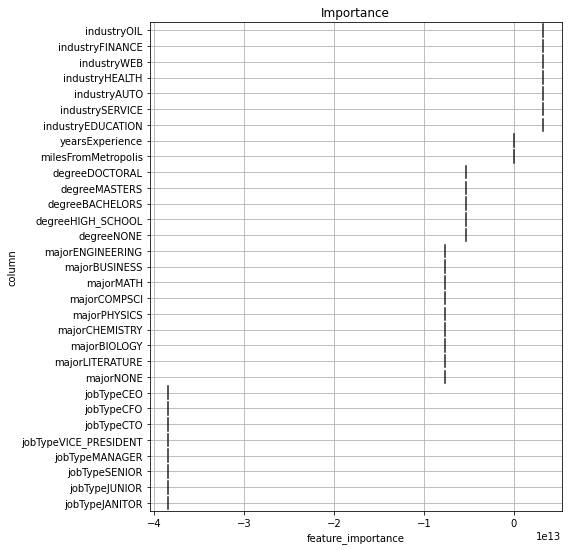

In [35]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lModel = LinearRegression() 


# Fit the model to the data
lModel.fit(X_train,y_train)



# print score of the model
print_score(lModel)



# visualizing the inportance of features.
fig, ax = visualize_importance(lModel.coef_, train_X)

### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

RMSE-Train: 7.908691761094098
RMSE-Test: 20.533355562486204
Score-Train: 0.9577201783513422
Score-Test: 0.7170542751466131
MedAE-Train: 5.170000000000002
MedAE-Test: 13.879999999999995
MeanAE-Train: 5.170000000000002
MeanAE-Test: 13.879999999999995 

CPU times: total: 4.95 s
Wall time: 13.4 s


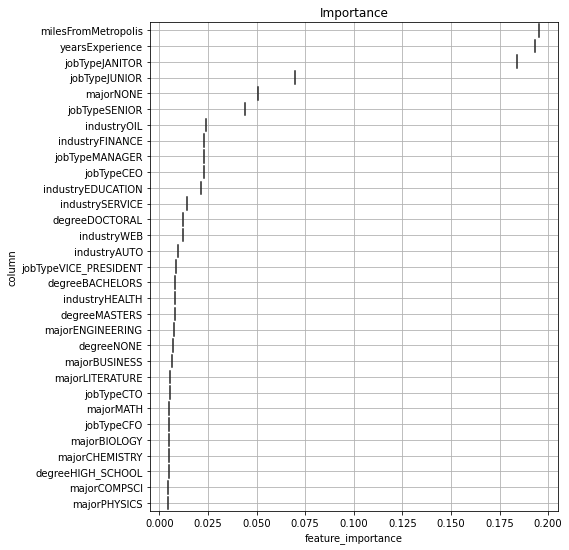

In [37]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()


# Fit the model to the data
rf.fit(X_train,y_train)



# print score of the model
print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X)

### KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note:
For KNN we used only 10000 samples out of 1000000.
You can use complete dataset if you want, it will take longer time to train the model.

In [42]:
%%time
# Fit a K-Neighbour Regressor model to the train dataset

# Import KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()


# print score of the model
knnr.fit(X_train, y_train)



# print score of the model
print_score(knnr)

# fig, ax = visualize_importance(knnr.feature_names_in_, X_train)


RMSE-Train: 18.432855515228038
RMSE-Test: 23.123616666358583
Score-Train: 0.770327453484537
Score-Test: 0.6411649942206846
MedAE-Train: 11.799999999999997
MedAE-Test: 14.799999999999997
MeanAE-Train: 11.799999999999997
MeanAE-Test: 14.799999999999997 

CPU times: total: 1min 11s
Wall time: 1min 20s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 19.26740996003104
RMSE-Test: 19.45000028613784
Score-Train: 0.7490596356983567
Score-Test: 0.7461234983218183
MedAE-Train: 13.586893554923023
MedAE-Test: 13.596218693176269
MeanAE-Train: 13.586893554923023
MeanAE-Test: 13.596218693176269 

CPU times: total: 1.16 s
Wall time: 2.76 s


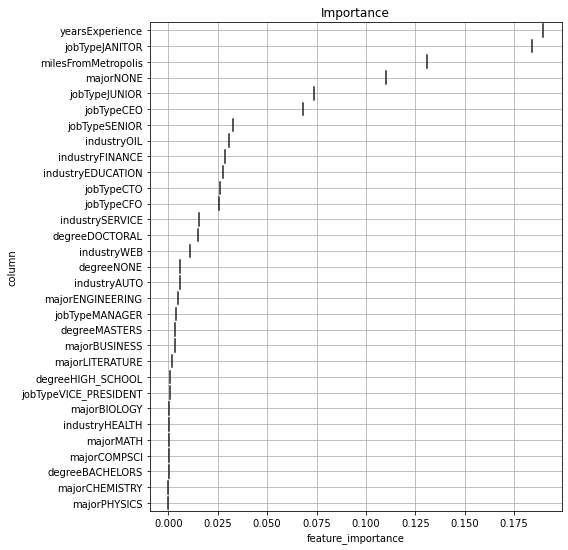

In [43]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)





# print score of the model
print_score(GBR)



# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_, X_train)




### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [45]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()



# Instantiate the model
DTR.fit(X_train, y_train)


# print score of the model
print_score(DTR)



RMSE-Train: 1.8726832234430515
RMSE-Test: 28.094553339397088
Score-Train: 0.9976294316180968
Score-Test: 0.470302961418296
MedAE-Train: 0.0
MedAE-Test: 18.0
MeanAE-Train: 0.0
MeanAE-Test: 18.0 

CPU times: total: 93.8 ms
Wall time: 235 ms


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 24.866527425320356
RMSE-Test: 24.821431819562683
Score-Train: 0.5820213204002832
Score-Test: 0.5865367240346436
MedAE-Train: 19.154983570646223
MedAE-Test: 18.931323283082065
MeanAE-Train: 19.154983570646223
MeanAE-Test: 18.931323283082065 

CPU times: total: 1.86 s
Wall time: 3.52 s


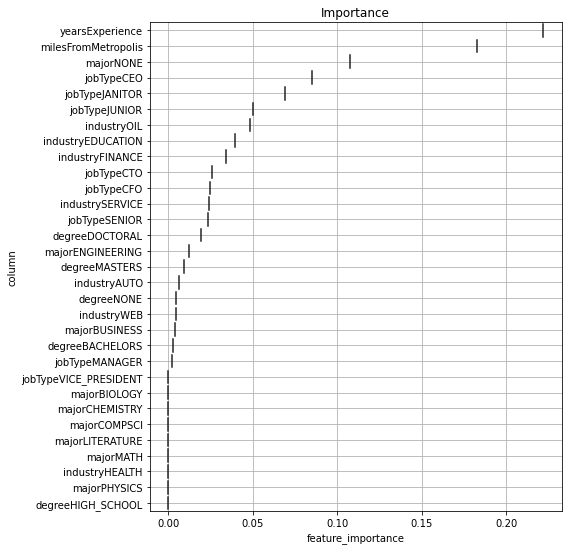

In [46]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()


# Instantiate the model
AdaBoost.fit(X_train, y_train)



# print score of the model
print_score(AdaBoost)



# visualizing the inportance of features.
fig, ax = visualize_importance(AdaBoost.feature_importances_, train_X)

# visualizing the importance of features.


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [49]:
pip install xgboost

  Using cached xgboost-2.0.0-py3-none-win_amd64.whl (99.7 MB)
Note: you may need to restart the kernel to use updated packages.


RMSE-Train: 15.933762662846272
RMSE-Test: 19.73165276641829
Score-Train: 0.828382909148319
Score-Test: 0.7387175680985743
MedAE-Train: 11.237030029296875
MedAE-Test: 13.682334899902344
MeanAE-Train: 11.237030029296875
MeanAE-Test: 13.682334899902344 

CPU times: total: 3.02 s
Wall time: 892 ms


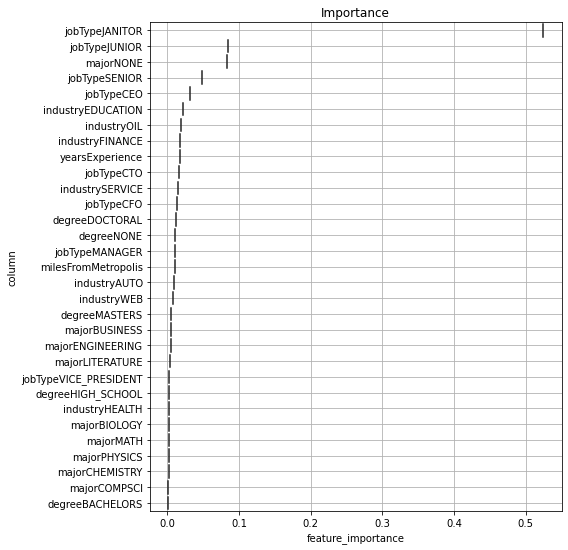

In [50]:
%%time
# Fit a XGB Regressor model to the train dataset
import xgboost
# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr =XGBRegressor()


# Fit the model to the data
xgbr.fit(X_train,y_train)


# print score of the model
print_score(xgbr)


# visualizing the inportance of features.
fig, ax = visualize_importance(xgbr.feature_importances_, X_train)



### Light Gradient Boosted Machine

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [52]:
pip install lightgbm

  Using cached lightgbm-4.1.0-py3-none-win_amd64.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 24439, number of used features: 31
[LightGBM] [Info] Start training from score 116.627112
RMSE-Train: 18.190226090345192
RMSE-Test: 19.126197867149568
Score-Train: 0.776333963441886
Score-Test: 0.7545061765103911
MedAE-Train: 13.038146291431786
MedAE-Test: 13.39984457389194
MeanAE-Train: 13.038146291431786
MeanAE-Test: 13.39984457389194 

CPU times: total: 1.16 s
Wall time: 780 ms


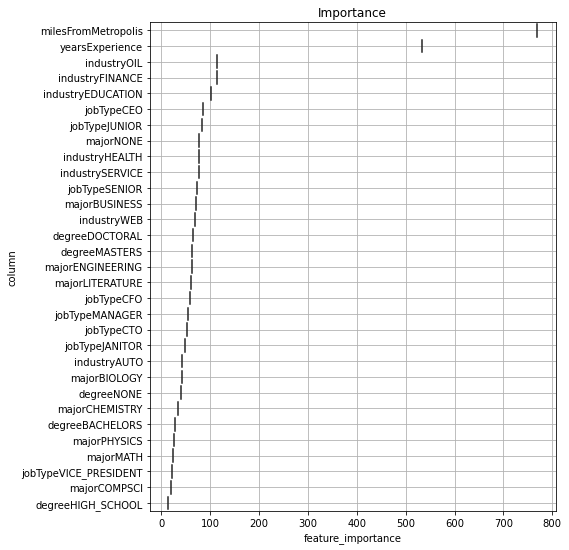

In [54]:
%%time
# Fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lg = lgbm.LGBMRegressor()


# Fit the model to the data
lg.fit(X_train, y_train)


# print score of the model
print_score(lg)


# visualizing the inportance of features.
fig, ax = visualize_importance(lg.feature_importances_, X_train)



### Comparing all the model based on metric

In [55]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [57]:
# list of models object
# list of models name
models= [lg, DTR, rf, knnr, GBR, xgbr, AdaBoost]
names = ['Lr', 'Dtree', 'Forest', 'Knn','GBR', 'Xboost', 'AdaBoost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,y_train,X_test,y_test)

#### RMSE of all model on train and test data

In [62]:
# printing rmse comparision of model on train and test

print(comp_model_train[:1])


  Metric         Lr     Dtree    Forest        Knn       GBR     Xboost  \
0   rmse  18.190226  1.872683  7.908692  18.432856  19.26741  15.933763   

    AdaBoost  
0  24.866527  


#### All metrics on train and test data

In [63]:
# printing comparision of model on train and test

comp_model_train


,Metric,Lr,Dtree,Forest,Knn,GBR,Xboost,AdaBoost
0,rmse,18.190226,1.872683,7.908692,18.432856,19.267410,15.933763,24.866527
1,MedAE,13.038146,0.000000,5.170000,11.800000,13.586894,11.237030,19.154984
2,MAE,14.807972,0.230356,6.232916,14.445722,15.569674,12.898327,20.775513
3,R-squared,0.701533,0.997624,0.950064,0.689289,0.618109,0.781734,0.154335


## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = 
  



  

In [ ]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv





In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv






In [ ]:
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            "max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv





In [ ]:
from xgboost import XGBRegressor


# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 "max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv





## Using the best parameters and training the models

### Random Forest Regressor

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= 



# Fit the model to the data



# print score of the model



# visualizing the inportance of features.
fig, ax = 




### Gradient Boosting Regressor

In [ ]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = 





# print score of the model



# visualizing the inportance of features.
fig, ax = 



### Decision Tree Regrsessor

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = 



# Instantiate the model



# print score of the model




### XGBoost Regressor

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr = 



# Fit the model to the data



# print score of the model



# visualizing the inportance of features.
fig, ax = 





## Comparing the metrics for tuned models

In [ ]:
models= [DTR, rf,GBR, xgbr]
names = ['Dtree', 'Forest','GBR', 'Xboost']
comp_model_train,comp_model_test = 




In [ ]:
print("Metrics on train data")
comp_model_train

### Now working with the test dataset provided

In [ ]:
# test data 
test_X = test_data
test_X

In [ ]:
# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
test_X = 



In [ ]:
# passing test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = 
test_X = 

test_X = 
test_X = 




In [ ]:
# Perforn the prediction on the test dataset
y_predicted = 






In [ ]:
# creating a dataframe of predicted results 
predictions = 



In [ ]:
# predicted values in dataframe




**Business Problem:**

In [ ]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample =




In [ ]:
train_cat = sample.iloc[:,0:4]   #categorical variables for sample

#encodind the samples
encoder = 
train_X = 

#processing the sample data
train = 

#taking those samples whose salary is very less i.e the reason for employee resigning
sample = 



#Preparing the x and y values
x_sample = 
y_sample = 



# passing test data for scaling
col_test = ['yearsExperience','milesFromMetropolis']
sample_x = 




In [ ]:
#predicting the sample
predicted_out = 



In [ ]:
y_sample  #Real values

### As we can see the difference in values.

**Example**: The last sample the real value is 58 but the model predicted it to be 74...This may be because the other competitors are offering him more as compared to the current salary..so he is leaving the company.

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`Insights`**:

- ### Mr.Francis provides these following insignts to Mr. Andrew after working on the dataset provided:

**1.Major employee of your company are not happy with the salary they are being provided..even if they have the required skills to do the job as compared to other competitors.**

**2.The employee living in the metro cities are satisfied with the salaries they are receiving...but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.**

    


## **`solution`**:

1. Either increase the salary of these employee's(if they have the required degree and major)

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. provide appraisal or some token of appreciation to such employee's

Note: take all the necessary steps to make the employee more loyal to the company

## **`QUESTION`**:

**Mr. Pandey provides the detail of a new hired employee and asks us to predict a range of salary which the company can offer to that employee:**

**job_type** = CTO

**degree** = Masters

**major** = Biology

**industry** = Health

**experience** = 17

miles from **metropolis** = 9

## **`SOLUTION`**:

We will fit in these data points into the model and suppose the model provide us the answer as 180

In this case we will basically provide the Manager with a range of salaries i.e

We can offer him a salary range of 175-190 dollars

## **`CONCLUSION`**:
According to this model, the predicted value we got,
matches with the actual target values. Does the model is performing well.
Even though we use only 50000 samples, the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, buid different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.